### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

### 1. Read Data

In [2]:
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


This dataset contains 3 months' worth of transaction for 100 customers which includes purchases, recurring transactions and salary transaction.

Let's see what all the columns are:

In [3]:
pd.DataFrame({'Columns':data.columns})

,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


In [4]:
print("Data Shape :",data.shape) 

Data Shape : (12043, 23)


### 2. Basic Checks

#### 2.1 Unique customers, unique transactions and 3 months of data

Before we explore each column individually, let's check for the following:

* 100 unique customers(customer_id)
* Each row corresponds to a unique transaction ID(transaction_id)
* 3 months worth of data(date)

In [5]:
print("Number of unique customer ID :",data.customer_id.nunique())

Number of unique customer ID : 100


We do indeed have 100 unique customers in this dataset

In [6]:
print("Number of rows in dataset :",len(data))
print("Number of unique transaction ID's :",data.transaction_id.nunique())

Number of rows in dataset : 12043
Number of unique transaction ID's : 12043


Number of unique transaction ID's correspond to the number or rows in the dataset which suggests that each row represent a single, unique transaction.

In [7]:
data.date.describe()

<ipython-input-7-2cb626a5e644>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

We do indeed have 3 months worth of data, starting from 1/8/2013 to 31/10/2013. However,  there are only 91 unique days which means that there is one missing data.

In [8]:
pd.date_range(start = "2018-08-01", end = "2018-10-31").difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

We have one missing date on 16/08/2013.

### 2.2 Non-Null count and data types

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

The info function provides information about the data types and presence of missing values in each column of the dataset.

### 2.3 Missing values

In [10]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing_percentage = round(missing / len(data), 3) * 100
pd.DataFrame({"Number of missing values" : missing, "Percentage": missing_percentage}).sort_values(by = "Percentage",ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


### 2.4 Descriptive statisctics of numerical variables

In [11]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


The describe function is a good way to observe anomalies in the numerical column. It also provides an overview of some basic statistics for the amount column.

### 3. Exploratory Data Analysis(EDA)

#### 3.1 Categorical variables 

* bpay_biller_code
* account
* merchant_id
* merchant_code
* first_name
* transaction_id
* customer_id

#### 3.1.1 Status

In [12]:
data.status.value_counts(dropna = False)

authorized    7717
posted        4326
Name: status, dtype: int64

Status of the individual transactions : authorised means transaction has already been approved, posted means still in the process.

#### 3.1.2 Card present flag

In [13]:
data.card_present_flag.value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

#### Card-not-present(CNP) 
 This transaction occurs when neither the cardholder nor the credit card is physically present at the time of the transaction.It's the most common for orders that happens remotely over the phone, internet or mail.

#### 3.1.3 Currency of Transaction

In [14]:
data.currency.value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

All transactions are made in AUD. Can potentially drop this column because unnecessary since it does not provide us with any additional information

#### 3.1.4 Longitude and Latitude

In [15]:
data.long_lat.head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

These are the coordinates where transactions are made.

#### 3.1.5 Transaction description(types of transaction)

In [16]:
data.txn_description.value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transaction by category')

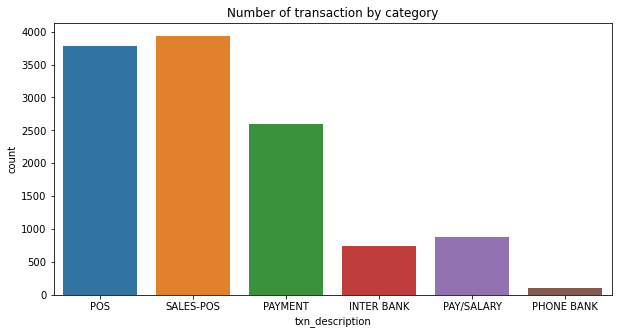

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(data.txn_description)
plt.title("Number of transaction by category")

These are the descriptions for each transaction.Transaction mostly consist of sales payment.

Also, this might explain the missing values in the merchant columns as not all transactions are purchases of goods and services from merchants

In [18]:
data[["txn_description", "amount"]].groupby("txn_description",as_index = False).mean().sort_values(by = "amount",ascending = False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

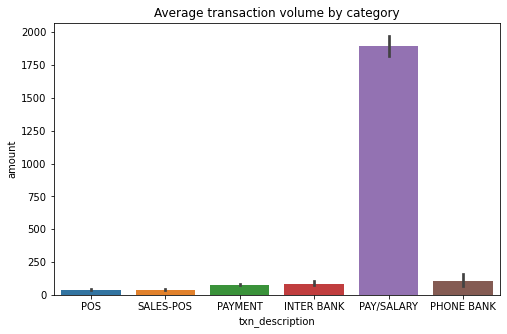

In [19]:
plt.figure(figsize = (8,5))
sns.barplot(x = "txn_description", y="amount",data = data)
plt.title("Average transaction volume by category")

Pay/Salary has the largest average transaction volume.

#### 3.1.6 Gender

In [20]:
data.gender.value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transaction by gender')

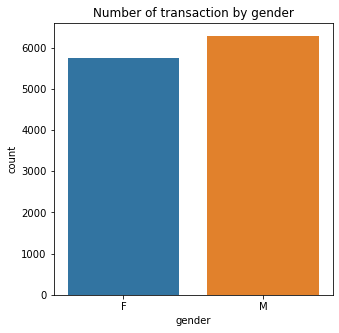

In [21]:
plt.figure(figsize = (5,5))
sns.countplot(data.gender)
plt.title("Number of transaction by gender")

There are more male customer transaction than there are female.

In [22]:
data[["gender", "amount"]].groupby("gender", as_index = False).mean().sort_values(by = "amount", ascending = False)

,gender,amount
1,M,205.721809
0,F,168.517303


Text(0.5, 1.0, 'Average transaction volume by gender')

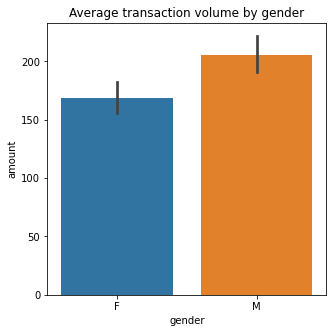

In [23]:
plt.figure(figsize = (5,5))
sns.barplot(x = "gender",y = "amount",data = data)
plt.title("Average transaction volume by gender")

Male has a higher average transaction volume

#### 3.1.7 Merchant Suburb

In [24]:
data.merchant_suburb.value_counts(dropna = False)

NaN              4326
Melbourne         255
Sydney            233
Southport          82
Brisbane City      79
                 ... 
Dowsing Point       1
Mount Clear         1
Bullsbrook          1
Edwardstown         1
Evatt               1
Name: merchant_suburb, Length: 1610, dtype: int64

There are the suburbs where the transaction were made.

#### 3.1.8 Merchant State

In [25]:
data.merchant_state.value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Transaction by State')

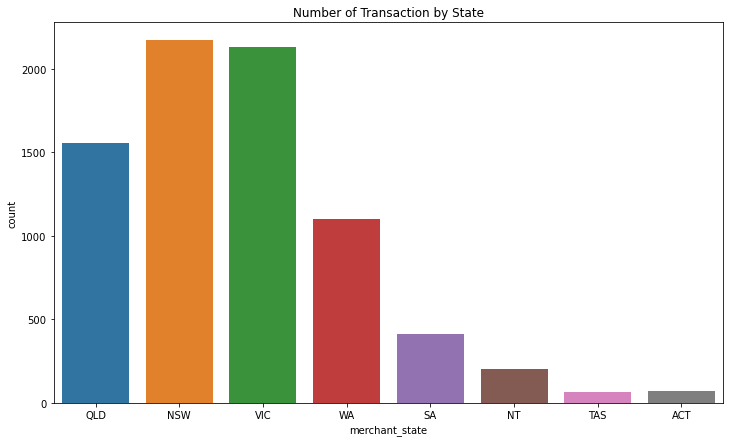

In [26]:
plt.figure(figsize = (12,7))
sns.countplot(data.merchant_state)
plt.title("Number of Transaction by State")

Similar to merchant suburb, these are the states where the transaction were made.

NSW and VIC are the top 2 states in number of transaction.

In [27]:
data[["merchant_state", "amount"]].groupby("merchant_state", as_index = False).mean().sort_values(by = "amount",ascending = False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

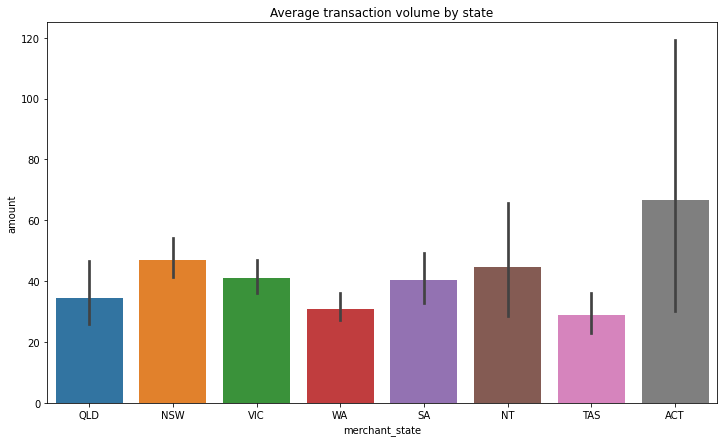

In [28]:
plt.figure(figsize = (12,7))
sns.barplot(x = "merchant_state", y ="amount", data= data)
plt.title("Average transaction volume by state")

ACT has the highest average transaction volume but the variance is quite large.

#### 3.1.9 Extraction

In [29]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

This appears to be the timestamp for each transaction. We can cross-reference this with the date column.

In [30]:
data[["date", "extraction"]].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


Since we already have an existing column, we can potentially extract only the time component out of the extraction column.

#### 3.1.10 Country

In [31]:
data.country.value_counts(dropna = False)

Australia    12043
Name: country, dtype: int64

All transaction were recorded within Australia.Therefore can consider droppping this column since it does not provide us with any inforamtion.

#### 3.1.11 Merchant longitude and latitude

In [32]:
data.merchant_long_lat.head()

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

These are the coordinates of the location.

#### 3.1.12 Movement (Debit/Credit)

In [33]:
data.movement.value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transaction by movement')

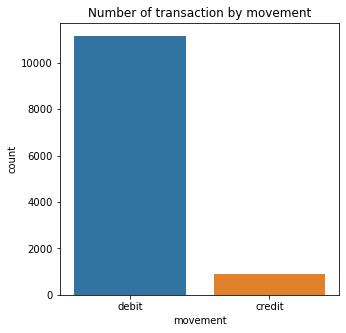

In [34]:
plt.figure(figsize = (5,5))
sns.countplot(data.movement)
plt.title("Number of transaction by movement")

Most transaction are overwhelming debit transactions.

Text(0.5, 1.0, 'Average transaction amount by movement')

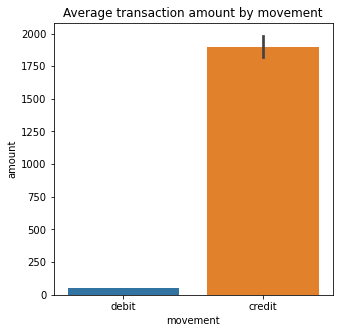

In [35]:
plt.figure(figsize = (5,5))
sns.barplot(x = "movement", y = "amount", data = data)
plt.title("Average transaction amount by movement")

However, the average transaction amount for credit transactions are higher.

### 3.2 Numerical Variables

#### 3.2.1 Balance

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance Distribution')

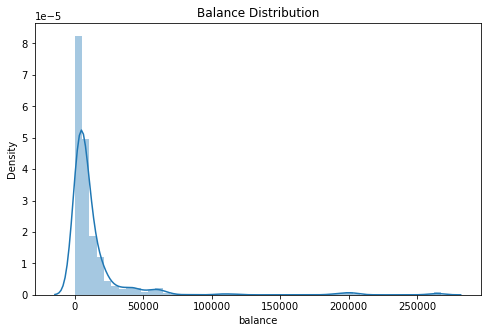

In [36]:
plt.figure(figsize = (8,5))
sns.distplot(data.balance)
plt.title("Balance Distribution")

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

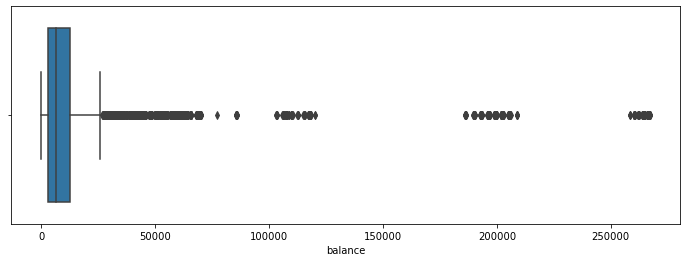

In [37]:
plt.figure(figsize = (12,4))
sns.boxplot(data.balance)

Distribution of the balance feature has a long tail.

#### 3.2.2 Age of Customers

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

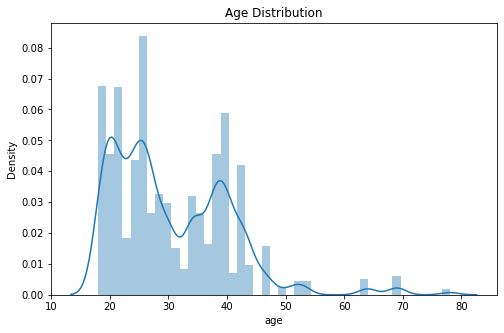

In [38]:
plt.figure(figsize = (8,5))
sns.distplot(data.age)
plt.title("Age Distribution")

#### 3.2.3 Transaction Amount

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount Distribution')

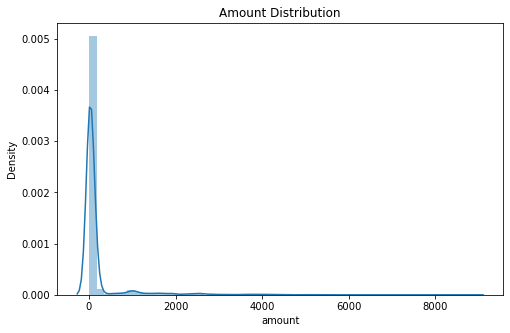

In [39]:
plt.figure(figsize = (8,5))
sns.distplot(data.amount)
plt.title("Amount Distribution")

### 4. Feature Engineering

In this section, we are going to focus on dropping unwanted columns, deal with missing values and finally create some additional features that will make our data analysis more detailed and robust.

#### 4.1 Drop unwanted columns

Drop currency and country columns as they do not provide any additional information.

In [40]:
print("Before: ",data.shape)
data = data.drop(["currency", "country"], axis = 1)
print("After: ", data.shape)

Before:  (12043, 23)
After:  (12043, 21)


#### 4.2 Deal with missing values

In [41]:
pd.DataFrame({"Number of missing values": missing, "Percentage": missing_percentage}).sort_values(by = "Percentage", ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


In [42]:
 nonSales = data.loc[(data.txn_description != "SALES - POS") | (data.txn_description != "POS"), :]
 nonSales.isnull().sum().sort_values(ascending = False)   

merchant_code        11160
bpay_biller_code     11158
card_present_flag     4326
merchant_state        4326
merchant_suburb       4326
merchant_id           4326
merchant_long_lat     4326
movement                 0
first_name               0
account                  0
long_lat                 0
txn_description          0
date                     0
balance                  0
gender                   0
age                      0
extraction               0
amount                   0
transaction_id           0
customer_id              0
status                   0
dtype: int64

In [43]:
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id", "merchant_long_lat"]
for col in cols:
    data[col].fillna("n/a", inplace = True)

In [44]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False)

merchant_code       11160
bpay_biller_code    11158
dtype: int64

Both merchant_code and bpay_biller are severely missing around 93%. Therefore, we will drop these 2 columns from the dataframe.

In [45]:
data = data.drop(["merchant_code", "bpay_biller_code"], axis = 1)

Now, make sure there are no more missing values

In [46]:
data.isnull().sum().max()

0

#### 4.3 Create features for month, day of week and hour

In [47]:
daily_amount = pd.DataFrame(data.groupby("date").amount.sum())
daily_amount

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50
...,...
2018-10-27,6971.58
2018-10-28,8438.11
2018-10-29,38549.14


Text(0, 0.5, 'Transaction Volume')

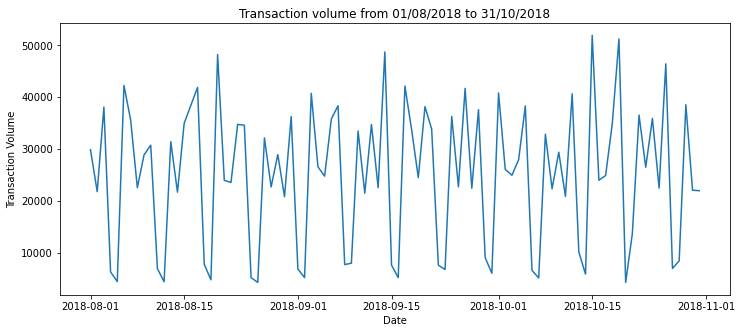

In [48]:
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume from 01/08/2018 to 31/10/2018")
plt.xlabel("Date")
plt.ylabel("Transaction Volume")

These appears to be a cyclical pattern in transaction volume over the 3 month period.My hypothesis for this occurence is:
    
* Salaries are paid out only on certain days of the week
* People tend to spend moreduring the weekends(shopping, going out with friends etc)

Therfore, to motivate this analysis, we will create 3 new features form noth the date and extraction columns:
  
* month
* dayofweek
* hour

In [49]:
data["month"] = pd.DatetimeIndex(data.date).month
data["dayofweek"] = pd.DatetimeIndex(data.date).dayofweek
data[["date", "month", "dayofweek"]].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In [50]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [51]:
data["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in data.extraction]
data.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [52]:
data["hour"] = [time.split(":")[0] for time in data.extraction]
data[["extraction", "hour"]].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [53]:
print("Before:", data.hour.dtype)
data["hour"] = pd.to_numeric(data.hour)
print("After:", data.hour.dtype)

Before: object
After: int64


### 5. Deep Dive

In [54]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,1
1,authorized,0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,1
2,authorized,1,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,1
3,authorized,1,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,1
4,authorized,1,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,1


#### 5.1 Purchases amount and overall amount

In [55]:
purchase_amount = data.loc[(data.txn_description == "POS") | (data.txn_description == "SALES-POS"), "amount"]
purchase_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase transaction amount')

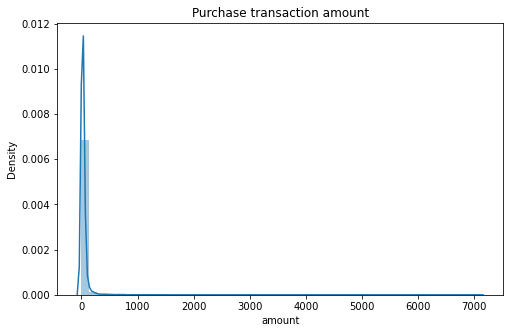

In [56]:
plt.figure(figsize = (8,5))
sns.distplot(purchase_amount)
plt.title("Purchase transaction amount")

In [57]:
purchase_amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall transaction amount')

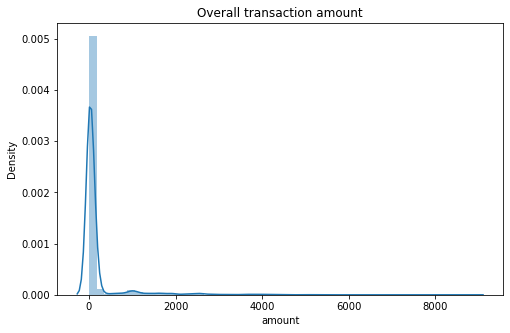

In [58]:
plt.figure(figsize =(8,5))
sns.distplot(data.amount)
plt.title("Overall transaction amount")

In [59]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

Variance in overall transaction amount is much higher than puchases transaction amount due to the inclusion of salary payments.

#### 5.2 Transaction volume per customer

In [60]:
customer_monthly_volume = pd.DataFrame(data.groupby("customer_id").amount.sum()/3)
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


C:\Users\91626\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customers monthly transaction volume')

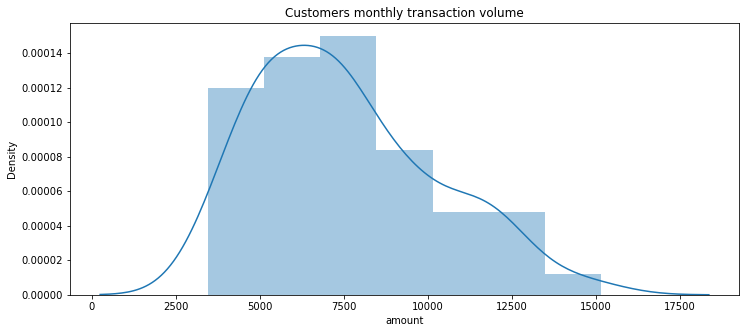

In [61]:
plt.figure(figsize = (12,5))
sns.distplot(customer_monthly_volume.amount)
plt.title("Customers monthly transaction volume")

#### 5.3 Transaction volume over time

Text(0.5, 1.0, 'Average transaction volume by month')

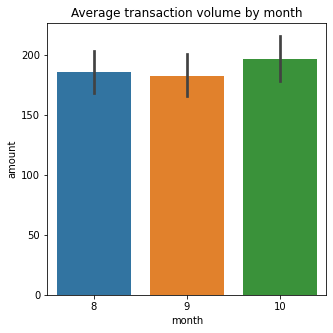

In [62]:
plt.figure(figsize = (5,5))
sns.barplot(x = "month", y = "amount", data = data)
plt.title("Average transaction volume by month")

In [63]:
average_daily_volume = pd.DataFrame(data.groupby("dayofweek").amount.mean())
average_daily_volume.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0.5, 0, 'Day of week')

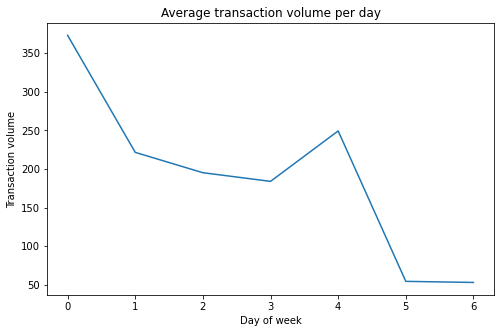

In [64]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(average_daily_volume.index, average_daily_volume.amount)
plt.title("Average transaction volume per day")
plt.ylabel("Transaction volume")
plt.xlabel("Day of week")

Friday and Saturday have the lowest average transaction  volume.Ley's see their breakdowns.

In [65]:
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [69]:
data.loc[data.txn_description == "PAY/SALARY", "category"] = "Salary"
data.loc[(data.txn_description == "SALES-POS") | (data.txn_description == "POS"), "category" ]= "Purchase"
data.category.fillna("Others", inplace = True)
data[["txn_description", "category"]].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


Text(0.5, 0, 'Day of week')

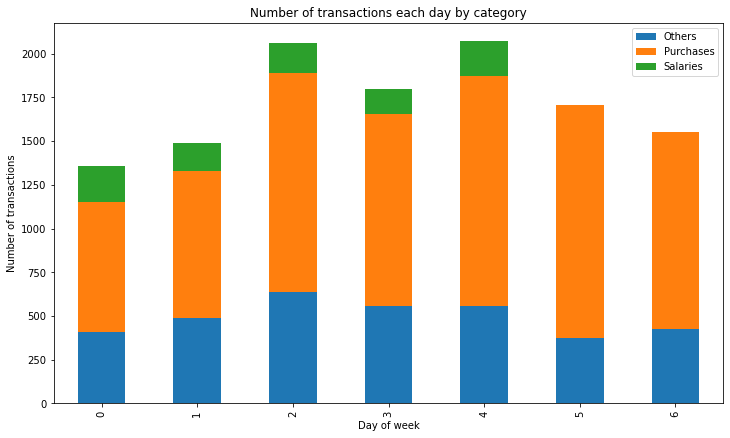

In [70]:
stacked_barplot = pd.DataFrame(data.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12,7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")

No salaries were paid on friday and saturday, therefore lower average transaction volume on those days.

Also, it does not seem to appear that people spend more on purchases over the weekends.

In [71]:
average_hourly_volume = pd.DataFrame(data.groupby("hour").amount.mean())
average_hourly_volume.head()

,amount
hour,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0.5, 0, 'Hour')

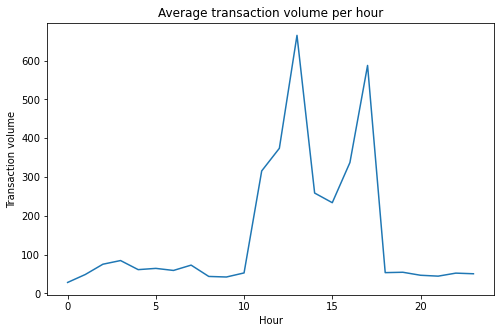

In [72]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(average_hourly_volume.index, average_hourly_volume.amount)
plt.title("Average transaction volume per hour")
plt.ylabel("Transaction volume")
plt.xlabel("Hour")

Highest transactions volumes happen during the midday and late afternoons.Let's see breakdown of these transactions by categories.

Text(0.5, 0, 'Hour')

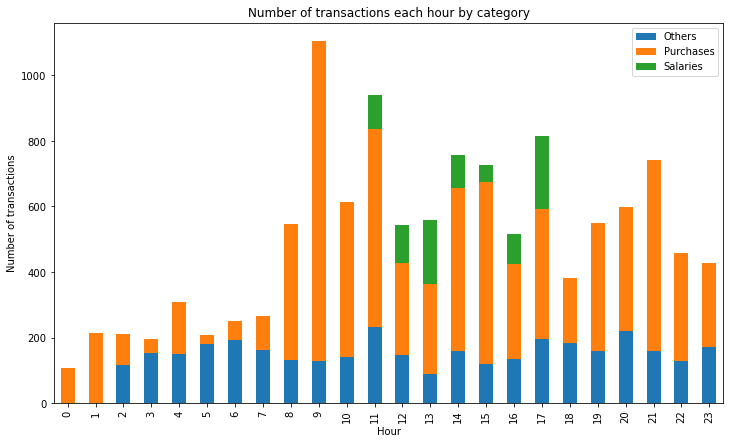

In [74]:
stacked_barplot = pd.DataFrame(data.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12,7))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Hour")